In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib
matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic') 
%matplotlib inline

# Open API 활용하여 데이터 가져오기
- 원격으로 접속해서 원격으로 
- 어딘가에 외부에서 제공해주는 데이터를 활용할 때 API

In [2]:
import requests

In [18]:
response = requests.get('http://openapi.seoul.go.kr:8088/sample/xml/gangnamTreeSaveInfo/1/5/') # 가장 뒤의 숫자 2는 개수를 말한다. 
# 서울시 공공데이터 쓰려고 하면 인증키 발급받아야 한다. 
# 리퀘스트로 네이버 접속한 것이다. 
# 네이버 자리에 서울시 공공데이터 보호수 샘플url을 넣었다. 인증키를 넣으라고 나오는데 그 인증키 자리에 sample을 썼다. 
# 샘플을 쓰니 샘플 데이터를 주는 듯 하다. 
# 서울시 공공데이터 페이지에서 데이터를 클릭하고 OpenAPI를 선택하면 긁을 수 있는 코드 아래에 여러 요청인자 정보들이 있다.

In [14]:
response.text # (HTML)

'<?xml version="1.0" encoding="UTF-8"?>\n<gangnamTreeSaveInfo>\n<list_total_count>5</list_total_count>\n<RESULT>\n<CODE>INFO-000</CODE>\n<MESSAGE>정상 처리되었습니다</MESSAGE>\n</RESULT>\n<row>\n<ID>1</ID>\n<SIDO>서울특별시</SIDO>\n<SIGUNGU>강남구</SIGUNGU>\n<MANAGE_NM>서울특별시 강남구청</MANAGE_NM>\n<APPOINMENT_NM>서23-1</APPOINMENT_NM>\n<APPOINMENT_DT>1968-07-03</APPOINMENT_DT>\n<TRMNAT_DT/>\n<TYPE_NM>거목</TYPE_NM>\n<GWA_NM>느릅나무과</GWA_NM>\n<HAK_NM>Zelkova serrata MAKINO</HAK_NM>\n<TREE_KIND>느티나무</TREE_KIND>\n<NUM>1</NUM>\n<AGE>730</AGE>\n<HEIGHT>22</HEIGHT>\n<CRCMFRNC>8.14</CRCMFRNC>\n<DIAMETER>29.4</DIAMETER>\n<POOM_NM>도나무</POOM_NM>\n<JIMOK_NM>공원</JIMOK_NM>\n<JIJEOK>809.5</JIJEOK>\n<OWNER_TYPE>공공</OWNER_TYPE>\n<ADDR>서울특별시 강남구 논현로51길</ADDR>\n<ADDR_OLD>서울특별시 강남구 도곡동 967-2(경남아파트 내)</ADDR_OLD>\n<YCODE>37.488605</YCODE>\n<XCODE>127.040793</XCODE>\n<DATA_DATE>2018-04-26</DATA_DATE>\n</row>\n<row>\n<ID>2</ID>\n<SIDO>서울특별시</SIDO>\n<SIGUNGU>강남구</SIGUNGU>\n<MANAGE_NM>서울특별시 강남구청</MANAGE_NM>\n<APPOINMENT_NM>서23-2</APPOIN

In [15]:
type(response.text)

str

In [19]:
import json
json.loads(response.text)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

* json (Java Script Object Notation)
 - 키(Key)와 값(Value)로 이루어진 데이터 객체
 - 파이썬의 사전(Dict) 데이터 타입과 동일
 - json online editor: https://jsoneditoronline.org/

# 데이터 실전 분석: 서울시 유동인구 분석

## 1. 데이터 적재

In [116]:
유동인구 = pd.read_excel('data/서울시유동인구/0_유동인구_유동인구기본_2015.xlsx',
                  skiprows = [0, 1, 3])

In [117]:
location = pd.read_excel('data/서울시유동인구/4_유동인구_조사지점정보_2015.xlsx', skiprows=[0, 1, 3],
                        sheet_name = None)

In [118]:
조사지점 = location['유동인구_조사지점정보_2015']
구코드 = location['GU_CD']
동코드 =location['DONG_CD']

## 2. 데이터 탐색 

### 2.1 유동인구 데이터 탐색

In [28]:
유동인구.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102956 entries, 0 to 102955
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID유동인구조사  102956 non-null  int64  
 1   조사지점코드    102956 non-null  object 
 2   조사구분      102956 non-null  object 
 3   조사요일      102956 non-null  object 
 4   시간대       102956 non-null  object 
 5   유동인구수     102956 non-null  float64
 6   년도        102956 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ MB


In [29]:
유동인구.head()

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도
0,1,30-001,지하철,금,07시-08시,129.0,2015
1,2,30-001,지하철,금,08시-09시,112.5,2015
2,3,30-001,지하철,금,09시-10시,108.0,2015
3,4,30-001,지하철,금,10시-11시,94.5,2015
4,5,30-001,지하철,금,11시-12시,87.0,2015


In [32]:
유동인구.조사구분.value_counts()

본조사       85890
계절요인조사    14000
지하철        2058
북촌         1008
Name: 조사구분, dtype: int64

In [33]:
# 조사구분이 본조사인 데이터만 선택 
유동인구[유동인구.조사구분 =='본조사']

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도
3066,3067,01-003,본조사,금,07시-08시,21.0,2015
3067,3068,01-003,본조사,금,08시-09시,36.0,2015
3068,3069,01-003,본조사,금,09시-10시,27.0,2015
3069,3070,01-003,본조사,금,10시-11시,51.0,2015
3070,3071,01-003,본조사,금,11시-12시,36.0,2015
...,...,...,...,...,...,...,...
88951,88952,25-815,본조사,화,16시-17시,672.0,2015
88952,88953,25-815,본조사,화,17시-18시,732.0,2015
88953,88954,25-815,본조사,화,18시-19시,1077.0,2015
88954,88955,25-815,본조사,화,19시-20시,753.0,2015


In [34]:
for col in ['조사요일','시간대']:
    print(유동인구[col].value_counts())
    print('------------------')

토    21000
금    20986
월    19978
수    19978
화    18046
목     2968
Name: 조사요일, dtype: int64
------------------
17시-18시    7354
20시-21시    7354
14시-15시    7354
16시-17시    7354
07시-08시    7354
08시-09시    7354
13시-14시    7354
18시-19시    7354
11시-12시    7354
10시-11시    7354
15시-16시    7354
12시-13시    7354
19시-20시    7354
09시-10시    7354
Name: 시간대, dtype: int64
------------------


In [35]:
# 목요일을 화요일로 변경
# 잘못 데이터가 수집되었다고 가정 
유동인구.조사요일.replace('목','화')

0         금
1         금
2         금
3         금
4         금
         ..
102951    토
102952    토
102953    토
102954    토
102955    토
Name: 조사요일, Length: 102956, dtype: object

In [36]:
유동인구.시간대.unique()

array(['07시-08시', '08시-09시', '09시-10시', '10시-11시', '11시-12시', '12시-13시',
       '13시-14시', '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시',
       '19시-20시', '20시-21시'], dtype=object)

In [40]:
유동인구.조사지점코드.value_counts().value_counts()

70     1027
140     200
42       73
Name: 조사지점코드, dtype: int64

In [41]:
유동인구.pivot_table(index = '시간대', columns='조사요일',values='ID유동인구조사',
                aggfunc = 'count')

조사요일,금,목,수,월,토,화
시간대,,,,,,
07시-08시,1499,212,1427,1427,1500,1289
08시-09시,1499,212,1427,1427,1500,1289
09시-10시,1499,212,1427,1427,1500,1289
10시-11시,1499,212,1427,1427,1500,1289
11시-12시,1499,212,1427,1427,1500,1289
12시-13시,1499,212,1427,1427,1500,1289
13시-14시,1499,212,1427,1427,1500,1289
14시-15시,1499,212,1427,1427,1500,1289
15시-16시,1499,212,1427,1427,1500,1289


### 3.2.2 조사지점 데이터 탐색

In [42]:
조사지점.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   조사지점코드    1500 non-null   object 
 1   조사지점명     1500 non-null   object 
 2   구코드       1408 non-null   float64
 3   동코드       1408 non-null   float64
 4   주번지       1418 non-null   object 
 5   부번지       1373 non-null   object 
 6   도로명       1233 non-null   object 
 7   보도너비      1421 non-null   float64
 8   차선수       1421 non-null   float64
 9   버스차로유무    1421 non-null   object 
 10  중앙선여부     1421 non-null   object 
 11  장애물유무     1421 non-null   object 
 12  장애물종류     1421 non-null   object 
 13  보행도로구분    1421 non-null   object 
 14  점자블록유무    1421 non-null   object 
 15  경사로유무     1421 non-null   object 
 16  펜스유무      1421 non-null   object 
 17  버스정류장유무   1421 non-null   object 
 18  기타시설유무    0 non-null      float64
 19  지하철유무     1421 non-null   object 
 20  횡단보도유무    1421 non-null   obje

In [43]:
조사지점 = 조사지점[조사지점.조사구분 == '본조사']

In [44]:
조사지점.조사구분.value_counts()

본조사    1227
Name: 조사구분, dtype: int64

In [45]:
조사지점.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 0 to 1426
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   조사지점코드    1227 non-null   object 
 1   조사지점명     1227 non-null   object 
 2   구코드       1212 non-null   float64
 3   동코드       1212 non-null   float64
 4   주번지       1218 non-null   object 
 5   부번지       1188 non-null   object 
 6   도로명       1033 non-null   object 
 7   보도너비      1221 non-null   float64
 8   차선수       1221 non-null   float64
 9   버스차로유무    1221 non-null   object 
 10  중앙선여부     1221 non-null   object 
 11  장애물유무     1221 non-null   object 
 12  장애물종류     1221 non-null   object 
 13  보행도로구분    1221 non-null   object 
 14  점자블록유무    1221 non-null   object 
 15  경사로유무     1221 non-null   object 
 16  펜스유무      1221 non-null   object 
 17  버스정류장유무   1221 non-null   object 
 18  기타시설유무    0 non-null      float64
 19  지하철유무     1221 non-null   object 
 20  횡단보도유무    1221 non-null   obje

In [48]:
# 구코드가 누락된 데이터는 제거 
조사지점 = 조사지점[조사지점.구코드.notnull()]

In [49]:
조사지점.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212 entries, 0 to 1426
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   조사지점코드    1212 non-null   object 
 1   조사지점명     1212 non-null   object 
 2   구코드       1212 non-null   float64
 3   동코드       1212 non-null   float64
 4   주번지       1209 non-null   object 
 5   부번지       1179 non-null   object 
 6   도로명       1024 non-null   object 
 7   보도너비      1212 non-null   float64
 8   차선수       1212 non-null   float64
 9   버스차로유무    1212 non-null   object 
 10  중앙선여부     1212 non-null   object 
 11  장애물유무     1212 non-null   object 
 12  장애물종류     1212 non-null   object 
 13  보행도로구분    1212 non-null   object 
 14  점자블록유무    1212 non-null   object 
 15  경사로유무     1212 non-null   object 
 16  펜스유무      1212 non-null   object 
 17  버스정류장유무   1212 non-null   object 
 18  기타시설유무    0 non-null      float64
 19  지하철유무     1212 non-null   object 
 20  횡단보도유무    1212 non-null   obje

In [51]:
# 필요한 컬럼만 조사지점에서 선택 
조사지점 = 조사지점[['조사지점코드','조사지점명','구코드','동코드','X좌표','Y좌표']]

### 3.2.3 데이터 합치기 - 분석에 필요한 컬럼들만 선택 (어떤 분석을 할지에 따라 변경 가능함)

In [52]:
최종데이터 = pd.merge(유동인구, 조사지점)

In [54]:
최종데이터 = pd.merge(최종데이터, 구코드[['구코드','구명']])
최종데이터

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도,조사지점명,구코드,동코드,X좌표,Y좌표,구명
0,3067,01-003,본조사,금,07시-08시,21.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,종로구
1,3068,01-003,본조사,금,08시-09시,36.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,종로구
2,3069,01-003,본조사,금,09시-10시,27.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,종로구
3,3070,01-003,본조사,금,10시-11시,51.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,종로구
4,3071,01-003,본조사,금,11시-12시,36.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98555,88952,25-815,본조사,화,16시-17시,672.0,2015,현대자동차 성내지점,11250.0,1125066.0,211778.66913,448392.48055,강동구
98556,88953,25-815,본조사,화,17시-18시,732.0,2015,현대자동차 성내지점,11250.0,1125066.0,211778.66913,448392.48055,강동구
98557,88954,25-815,본조사,화,18시-19시,1077.0,2015,현대자동차 성내지점,11250.0,1125066.0,211778.66913,448392.48055,강동구
98558,88955,25-815,본조사,화,19시-20시,753.0,2015,현대자동차 성내지점,11250.0,1125066.0,211778.66913,448392.48055,강동구


In [55]:
최종데이터 = pd.merge(최종데이터, 동코드[['동코드','동명']])
최종데이터

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도,조사지점명,구코드,동코드,X좌표,Y좌표,구명,동명
0,3067,01-003,본조사,금,07시-08시,21.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,종로구,부암동
1,3068,01-003,본조사,금,08시-09시,36.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,종로구,부암동
2,3069,01-003,본조사,금,09시-10시,27.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,종로구,부암동
3,3070,01-003,본조사,금,10시-11시,51.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,종로구,부암동
4,3071,01-003,본조사,금,11시-12시,36.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,종로구,부암동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98555,102952,25-430,계절요인조사,토,16시-17시,1716.0,2015,신동아생활용품DC마트,11250.0,1125072.0,211375.75228,450168.33297,강동구,암사1동
98556,102953,25-430,계절요인조사,토,17시-18시,2010.0,2015,신동아생활용품DC마트,11250.0,1125072.0,211375.75228,450168.33297,강동구,암사1동
98557,102954,25-430,계절요인조사,토,18시-19시,1656.0,2015,신동아생활용품DC마트,11250.0,1125072.0,211375.75228,450168.33297,강동구,암사1동
98558,102955,25-430,계절요인조사,토,19시-20시,1791.0,2015,신동아생활용품DC마트,11250.0,1125072.0,211375.75228,450168.33297,강동구,암사1동


## (실습 #1) 유동인구를 시간대 별로 분석하여 시각화하기


In [58]:
유동인구

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도
0,1,30-001,지하철,금,07시-08시,129.0,2015
1,2,30-001,지하철,금,08시-09시,112.5,2015
2,3,30-001,지하철,금,09시-10시,108.0,2015
3,4,30-001,지하철,금,10시-11시,94.5,2015
4,5,30-001,지하철,금,11시-12시,87.0,2015
...,...,...,...,...,...,...,...
102951,102952,25-430,계절요인조사,토,16시-17시,1716.0,2015
102952,102953,25-430,계절요인조사,토,17시-18시,2010.0,2015
102953,102954,25-430,계절요인조사,토,18시-19시,1656.0,2015
102954,102955,25-430,계절요인조사,토,19시-20시,1791.0,2015


In [63]:
import matplotlib.pyplot as plt

/Users/hayeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hayeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)


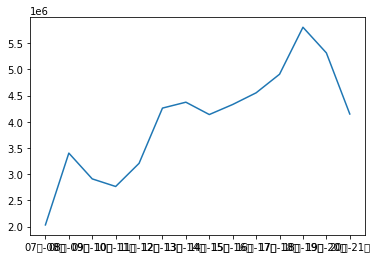

In [64]:
plt.plot(유동인구.pivot_table(index ='시간대',values='유동인구수',aggfunc='sum'))

## (실습 #2) 구별 유동인구 통계 분석 및 시각화
### 구별로 조사지점의 개수가 다르므로, 조사지점 당 평균 유동인구수로 분석

In [66]:
최종데이터

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도,조사지점명,구코드,동코드,X좌표,Y좌표,구명,동명
0,3067,01-003,본조사,금,07시-08시,21.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,종로구,부암동
1,3068,01-003,본조사,금,08시-09시,36.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,종로구,부암동
2,3069,01-003,본조사,금,09시-10시,27.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,종로구,부암동
3,3070,01-003,본조사,금,10시-11시,51.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,종로구,부암동
4,3071,01-003,본조사,금,11시-12시,36.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,종로구,부암동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98555,102952,25-430,계절요인조사,토,16시-17시,1716.0,2015,신동아생활용품DC마트,11250.0,1125072.0,211375.75228,450168.33297,강동구,암사1동
98556,102953,25-430,계절요인조사,토,17시-18시,2010.0,2015,신동아생활용품DC마트,11250.0,1125072.0,211375.75228,450168.33297,강동구,암사1동
98557,102954,25-430,계절요인조사,토,18시-19시,1656.0,2015,신동아생활용품DC마트,11250.0,1125072.0,211375.75228,450168.33297,강동구,암사1동
98558,102955,25-430,계절요인조사,토,19시-20시,1791.0,2015,신동아생활용품DC마트,11250.0,1125072.0,211375.75228,450168.33297,강동구,암사1동


In [71]:
ex2 = 최종데이터.pivot_table(index = ['구명','조사지점명'], values='유동인구수', aggfunc = 'mean')

## (실습 #3) 서울시 각 구별로 출퇴근/그 외 시간의 유동인구 분석 (출퇴근 시간은 7시-10시, 18시-21시로 가정함)


In [78]:
최종데이터.head()

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도,조사지점명,구코드,동코드,X좌표,Y좌표,구명,동명
0,3067,01-003,본조사,금,07시-08시,21.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,종로구,부암동
1,3068,01-003,본조사,금,08시-09시,36.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,종로구,부암동
2,3069,01-003,본조사,금,09시-10시,27.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,종로구,부암동
3,3070,01-003,본조사,금,10시-11시,51.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,종로구,부암동
4,3071,01-003,본조사,금,11시-12시,36.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,종로구,부암동


In [93]:
ex3 = 최종데이터[['시간대','유동인구수']]

In [102]:
ex3 = ex3[(ex3.시간대 == '07시-08시') | (ex3.시간대 == '08시-09시')|(ex3.시간대 == '09시-10시')|(ex3.시간대 == '18시-19시')|
   (ex3.시간대 == '19시-20시')|(ex3.시간대 == '20시-21시')]

<AxesSubplot:xlabel='시간대'>

/Users/hayeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hayeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hayeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hayeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hayeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hayeon/opt/anaconda3/lib/python3.8/site-packages/matp

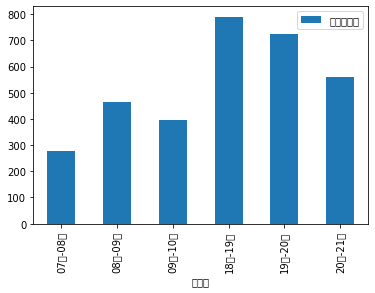

In [108]:
(ex3.pivot_table(index='시간대',values='유동인구수',aggfunc='mean')).plot(kind='bar')

In [198]:
def 주말여부(x):
    if x in ['월','화','수','목','금']:
        return '평일'
    else:
        return '주말'

In [200]:
최종데이터.조사요일.apply(주말여부)

0        평일
1        평일
2        평일
3        평일
4        평일
         ..
98555    주말
98556    주말
98557    주말
98558    주말
98559    주말
Name: 조사요일, Length: 98560, dtype: object

## (실습 #4) 평일/주말 유동인구 분석 및 시각화


In [120]:
유동인구.조사요일 = 유동인구.조사요일.replace(['월','화','수','목','금'],'평일')

In [122]:
유동인구.조사요일 = 유동인구.조사요일.replace(['토','일'], '주말')

In [128]:
ex4 = 유동인구.pivot_table(index='조사요일',values='유동인구수', aggfunc='mean')

<AxesSubplot:ylabel='조사요일'>

/Users/hayeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hayeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)


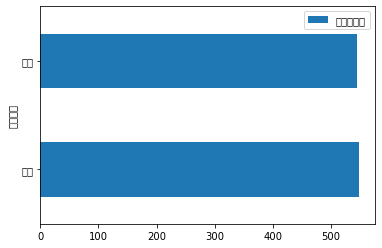

In [130]:
ex4.plot(kind = 'barh')

## (실습 #5) 유동인구의 수와 보행환경 정보를 분석 
* 보행환경 정보는 유동인구상세로그_2015.xlsx의 보행환경 컬럼 참고. 매우불만족(1), 약간불만족(2), 보통(3), 약간만족(4), 매우만족(5)
### 5.1 보행 환경 개선이 시급한 곳 10군데를 선정. 

In [131]:
유동인구

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도
0,1,30-001,지하철,평일,07시-08시,129.0,2015
1,2,30-001,지하철,평일,08시-09시,112.5,2015
2,3,30-001,지하철,평일,09시-10시,108.0,2015
3,4,30-001,지하철,평일,10시-11시,94.5,2015
4,5,30-001,지하철,평일,11시-12시,87.0,2015
...,...,...,...,...,...,...,...
102951,102952,25-430,계절요인조사,주말,16시-17시,1716.0,2015
102952,102953,25-430,계절요인조사,주말,17시-18시,2010.0,2015
102953,102954,25-430,계절요인조사,주말,18시-19시,1656.0,2015
102954,102955,25-430,계절요인조사,주말,19시-20시,1791.0,2015


In [218]:
보행환경 = pd.read_excel('/Users/hayeon/Downloads/데청캠/판다스/pandas와시각화 실습자료/data/서울시유동인구/2_유동인구_속성조사_2015.xlsx',
                    skiprows=[0, 1, 3])

In [219]:
보행환경 = 보행환경[['조사지점코드','보행환경']]

In [179]:
new = 보행환경[보행환경['보행환경']=='매우불만족']

In [188]:
(new.pivot_table(index='조사지점코드', values='보행환경', aggfunc='count')).sort_values(by='보행환경', ascending=False).head(10)

,보행환경
조사지점코드,
15-120,20
06-115,20
19-034,18
01-2095,17
17-2077,17
17-2055,16
17-3102,16
19-1191,16
23-091,15


In [220]:
보행환경

,조사지점코드,보행환경
0,01-003,약간만족
1,01-003,매우만족
2,01-003,약간만족
3,01-003,약간만족
4,01-003,매우만족
...,...,...
19995,25-463,보통
19996,25-463,보통
19997,25-463,보통
19998,25-463,약간불만족


### 5.2 구별 보행환경점수 지도 시각화

In [224]:
def 보행점수(x):
    if x =='매우불만족':
        return 1
    elif x =='약간불만족':
        return 2
    elif x=='보통':
        return 3
    elif x == '약간만족':
        return 4
    else:
        return 5

In [238]:
pd.DataFrame(ex55.보행환경.apply(보행점수))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [236]:
ex55 = pd.concat([ex55, num], axis=1)

In [241]:
ex55

,조사지점코드,조사지점명,구명,보행환경,보행환경
0,01-003,신흥모피명품전문크리닝.,종로구,약간만족,4
1,01-003,신흥모피명품전문크리닝.,종로구,매우만족,5
2,01-003,신흥모피명품전문크리닝.,종로구,약간만족,4
3,01-003,신흥모피명품전문크리닝.,종로구,약간만족,4
4,01-003,신흥모피명품전문크리닝.,종로구,매우만족,5
...,...,...,...,...,...
1663195,25-430,신동아생활용품DC마트,강동구,매우불만족,1
1663196,25-430,신동아생활용품DC마트,강동구,보통,3
1663197,25-430,신동아생활용품DC마트,강동구,보통,3
1663198,25-430,신동아생활용품DC마트,강동구,매우불만족,1


In [ ]:
ex55.drop(ex55)

In [203]:
fi = 최종데이터[['조사지점코드','조사지점명','구명']]

In [221]:
ex55 = pd.merge(fi, 보행환경)

In [244]:
import matplotlib as plt 
plt.rcParams['font.family'] = 'AppleGothic'

<AxesSubplot:ylabel='구명'>

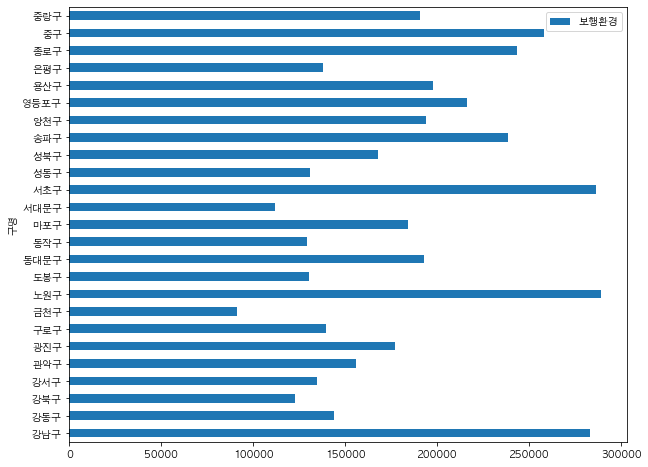

In [247]:
(ex55.pivot_table(index='구명', values='보행환경', aggfunc='sum')).plot(kind='barh', figsize=(10, 8))

In [252]:
ex55

,조사지점코드,조사지점명,구명,보행환경,보행환경
0,01-003,신흥모피명품전문크리닝.,종로구,약간만족,4
1,01-003,신흥모피명품전문크리닝.,종로구,매우만족,5
2,01-003,신흥모피명품전문크리닝.,종로구,약간만족,4
3,01-003,신흥모피명품전문크리닝.,종로구,약간만족,4
4,01-003,신흥모피명품전문크리닝.,종로구,매우만족,5
...,...,...,...,...,...
1663195,25-430,신동아생활용품DC마트,강동구,매우불만족,1
1663196,25-430,신동아생활용품DC마트,강동구,보통,3
1663197,25-430,신동아생활용품DC마트,강동구,보통,3
1663198,25-430,신동아생활용품DC마트,강동구,매우불만족,1


In [ ]:
보행환경['보행점수'] = 보행환경.map({
    '매우불만족':1,
    '약간불만족':2,
    '보통':3
    '약간만족':4
    '매우만족':5
})

# ===================== 지도시각화 ===========================

In [253]:
조사지점 # 좌표정보 

,조사지점코드,조사지점명,구코드,동코드,주번지,부번지,도로명,보도너비,차선수,버스차로유무,...,지구중심상세내용,도심부도심지역명,용도구분,거주유형구분,입지유형명,X좌표,Y좌표,집계구코드,년도,조사구분
0,01-003,신흥모피명품전문크리닝.,11010.0,1101055.0,127,11,NaN,3.0,8.0,유,...,NaN,NaN,2종주거,NaN,NaN,196423.97707,455511.52968,1.101055e+12,2015,본조사
1,01-004,GS25,11010.0,1101055.0,94,2,세검정로 230,3.0,7.0,유,...,NaN,NaN,2종주거,NaN,NaN,196315.80243,455621.38262,1.101055e+12,2015,본조사
2,01-005,세검정정류장,11010.0,1101055.0,92,0,세검정길,4.0,5.0,유,...,NaN,NaN,1종주거,NaN,NaN,196357.17125,455680.82580,1.101055e+12,2015,본조사
3,01-008,안성타워內 굿모닝파워공인중개사.,11010.0,1101056.0,72,72,NaN,4.0,4.0,유,...,NaN,NaN,2종주거,NaN,NaN,197904.19277,456718.34996,1.101056e+12,2015,본조사
4,01-009,복실 손뜨기.,11010.0,1101056.0,88,46,NaN,2.0,7.0,유,...,NaN,NaN,2종주거,NaN,NaN,196360.44943,456405.89296,1.101056e+12,2015,본조사
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,40-020,원서공원 입구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,북촌
1496,40-021,커피 Biwon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,북촌
1497,40-022,용수산 비원점,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,북촌
1498,40-023,한정식 장원,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,북촌
